In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns
import numpy as np
%config InlineBackend.figure_format='retina'

PROC_DATA_PATH = '~/library/data/processed/'

econ_features = ['3_year_survival_rate', 'job_density', 'number_of_jobs', '3_year_survival_number']
qualif_features = ['NVQ4_rate', 'no_qualif_rate']

col_to_drop = ['area', 'code', 'unemployment_rate','year']

In [72]:
# Load in the data
df = pd.read_csv(PROC_DATA_PATH + 'borough-unemployment-and-business-data.csv', index_col=0)

In [73]:
econ_df = df[np.setdiff1d(df.columns.tolist(), qualif_features)].copy()
qualif_df = df[np.setdiff1d(df.columns.tolist(), econ_features)].copy()

In [74]:
econ_df.drop(columns=col_to_drop, inplace=True, axis=1)
qualif_df.drop(columns=col_to_drop, inplace=True, axis=1)

In [91]:
qualif_df

,NVQ4_rate,no_qualif_rate,youth_unemployment_rate
0,33.2,8.6,22.734367
1,57.3,3.7,9.944418
2,29.6,4.8,10.870386
3,33.8,8.2,14.681718
4,47.1,5.4,10.269752
5,69.4,4.0,13.865943
6,43.1,6.2,16.016635
7,54.7,5.9,12.986582
8,44.0,5.4,19.496204
9,49.2,6.6,17.029480


In [98]:
X = econ_df.values
X_std = StandardScaler().fit_transform(X)

In [107]:
Y = qualif_df.values
Y_std = StandardScaler().fit_transform(Y)

([<matplotlib.axis.XTick at 0x7f8e5b18e550>,
 <a list of 3 Text xticklabel objects>)

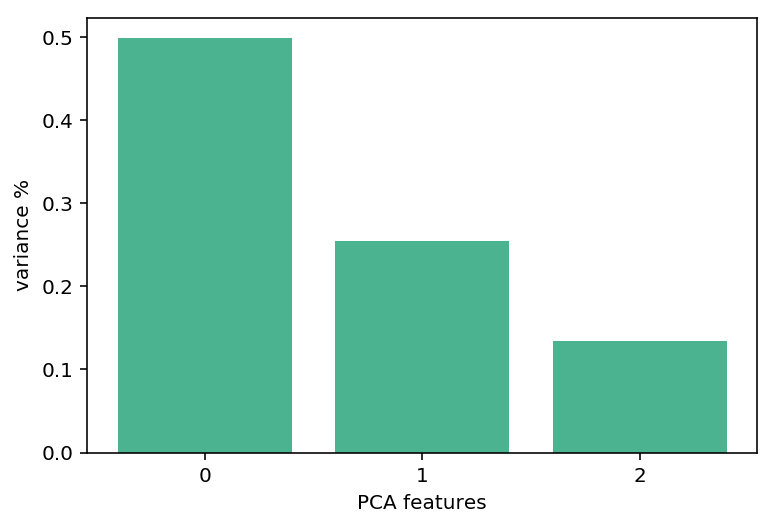

In [108]:
# Create a PCA instance: pca
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances to identify no of needed PCs
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='#4CB391')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

([<matplotlib.axis.XTick at 0x7f8e5c4e8eb8>,
 <a list of 3 Text xticklabel objects>)

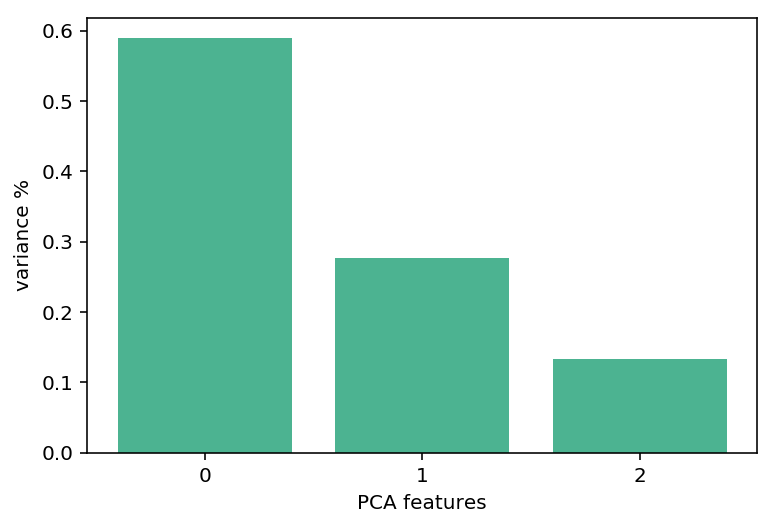

In [109]:
# Create a PCA instance: pca
pca_qualif = PCA(n_components=3)
principalComponents_ = pca_qualif.fit_transform(Y_std)

# Plot the explained variances to identify no of needed PCs
features = range(pca_qualif.n_components_)
plt.bar(features, pca_qualif.explained_variance_ratio_, color='#4CB391')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [110]:
PCA_components = pd.DataFrame(principalComponents)

In [111]:
PCA_components_qualif = pd.DataFrame(principalComponents_)

Text(0, 0.5, 'PCA 2')

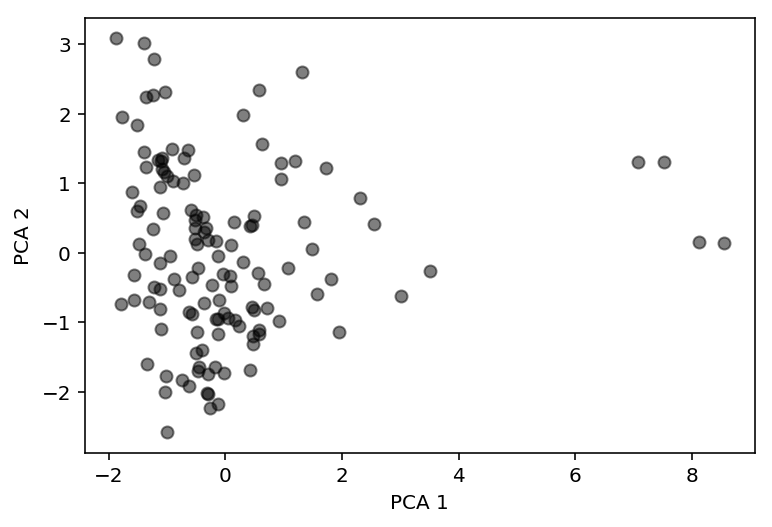

In [112]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, c='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

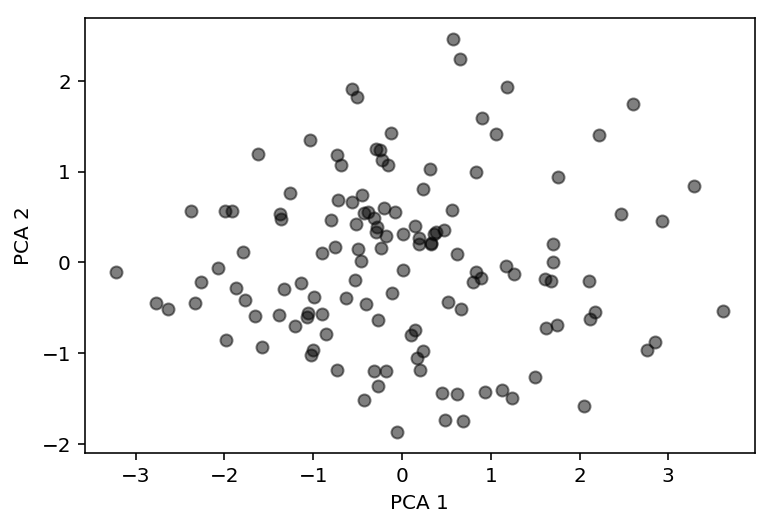

In [113]:
plt.scatter(PCA_components_qualif[0], PCA_components_qualif[1], alpha=.5, c='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

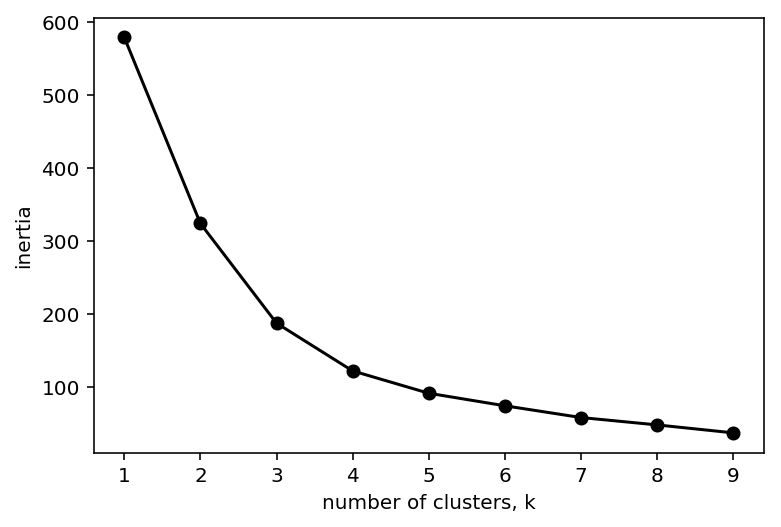

In [114]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=0)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

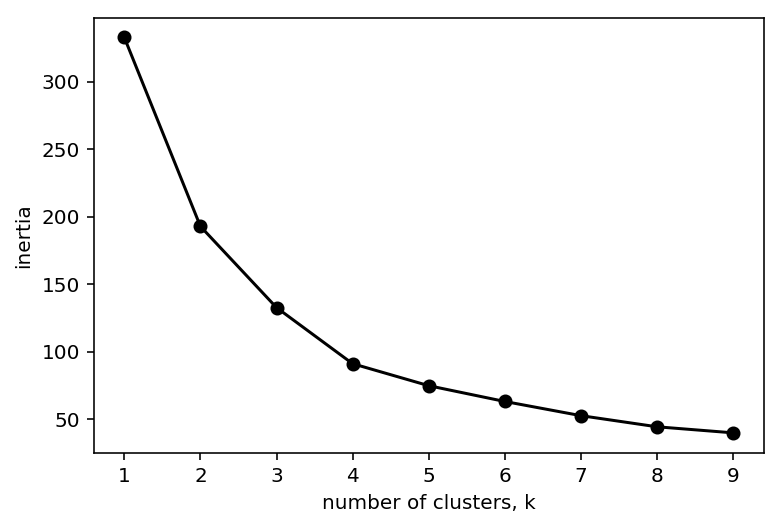

In [116]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=0)
    
    # Fit model to samples
    model.fit(PCA_components_qualif.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

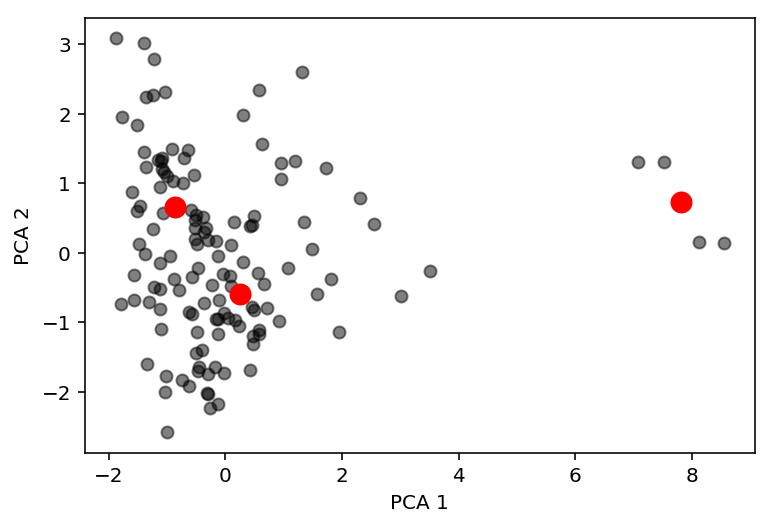

In [122]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = model.fit_predict(PCA_components.iloc[:,:3])
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, c='black')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

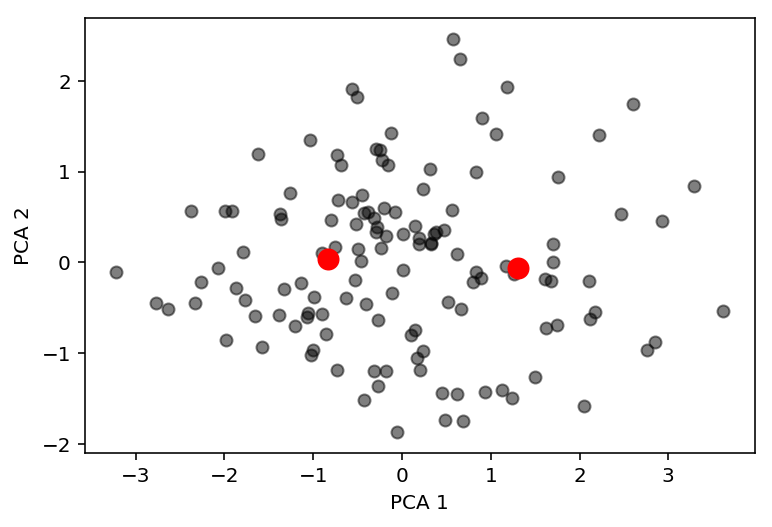

In [120]:
model_qualif = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = model_qualif.fit_predict(PCA_components_qualif.iloc[:,:3])
plt.scatter(PCA_components_qualif[0], PCA_components_qualif[1], alpha=.5, c='black')
plt.scatter(model_qualif.cluster_centers_[:, 0], model_qualif.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [121]:
model.labels_

array([4, 1, 8, 5, 3, 6, 4, 0, 4, 4, 4, 0, 6, 1, 5, 5, 0, 6, 2, 3, 0, 6,
       1, 4, 4, 7, 6, 8, 4, 4, 2, 6, 4, 3, 8, 5, 1, 2, 1, 3, 4, 4, 6, 2,
       6, 1, 8, 1, 3, 6, 2, 1, 0, 6, 1, 4, 3, 7, 6, 1, 0, 4, 7, 2, 5, 1,
       8, 3, 1, 2, 1, 3, 1, 1, 0, 2, 0, 1, 8, 1, 3, 0, 2, 7, 2, 1, 1, 5,
       1, 7, 0, 1, 0, 5, 2, 2, 5, 3, 8, 3, 1, 7, 1, 3, 1, 3, 2, 2, 3, 7,
       8, 3, 3, 2, 2, 7, 2, 3, 1, 3, 1, 7, 2, 1, 3, 3, 7, 7], dtype=int32)

In [123]:
econ_df['group'] = model.labels_
qualif_df['group'] = model_qualif.labels_

In [48]:
PCA_components[5]=model.labels_

In [51]:
PCA_components.drop(columns={'5'}, inplace=True)

In [84]:
econ_df.columns

Index(['3_year_survival_number', '3_year_survival_rate', 'job_density',
       'number_of_jobs', 'youth_unemployment_rate', 'group'],
      dtype='object')

In [124]:
qualif_df.columns

Index(['NVQ4_rate', 'no_qualif_rate', 'youth_unemployment_rate', 'group'], dtype='object')

In [87]:
fig = px.scatter_matrix(econ_df, 
                        dimensions=['3_year_survival_rate', 'job_density', 'youth_unemployment_rate'],
                        color='group',
                        labels={col:col.replace('_', ' ') for col in econ_df.columns})
                        

fig.show()

In [126]:
fig = px.scatter_matrix(qualif_df, 
                        dimensions=['NVQ4_rate', 'no_qualif_rate'],
                        color='group',
                        labels={col:col.replace('_', ' ') for col in qualif_df.columns})
                        

fig.show()